<div align="justify"><h1><b><font size="6">
  Input Assumptions for Modelling the Building Sector in the negaWatt-BE Scenario</h1></font></div>
<div align="justify"><h2><b><font size="5">
  ENERGY DEMAND FOR THE BUILDING SECTOR IN BELGIUM
</h2></font></b></div>

---
<div align="justify"><h3><font size="3">
  <b> Developer:</b> LATERRE Antoine, BERNAERTS Valentine, QUOILIN Sylvain, MEYER Sébastien
</h3></font></div>
    
---


To ensure transparency and consistency within the negaWatt-BE project, this notebook documents all key input assumptions related to the building sector. It computes the energy demand of the residential and tertiary sectors under sufficiency and efficiency measures over the energy transition period (2020–2050). Projections are based on statistical data from the starting reference year, and the resulting energy demand values are directly used as inputs for the PyPSA model.

> **Note:** The reference year is 2019 instead of 2020, due to the disruptions caused by the COVID-19 pandemic in 2020. This choice ensures greater consistency and realism in the baseline and future projections.


<font size="4"><b>Table of Contents</b></font><a class="anchor" id="contents"></a> <br>

1. [Introduction](#section_1)
    - 1.1. [Sufficiency vs Efficiency](#section_1_1)
    - 1.2. [Global Demands](#section_1_2)
        - 1.2.1. [Residential Sector](#section_1_2_1)
        - 1.2.2. [Tertiary Sector](#section_1_2_2)
        - 1.2.3. [Data Processing](#section_1_2_3)
2. [Residential Sector](#section_2)
    - 2.1. [Thermal Uses](#section_2_1)
    - 2.2. [Specific Electrical Uses](#section_2_2)
    - 2.3. [Global Data Processing](#section_2_3)
3. [Tertiary Sector](#section_3)
    - 3.1. [Thermal Uses](#section_3_1)
    - 3.2. [Specific Electrical Uses](#section_3_2)
    - 3.3. [Global Data Processing](#section_3_3)
4. [Total End-Use Demand](#section_4)
5. [Short List of Sufficiency Assumptions](#section_5)


<font size="4"><b>References</b></font><a class="anchor" id="references"></a> <br>

* [1] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Gea Bermudez, Juan; Neuwahl, Frederik (2025). JRC-IDEES-2023. European Commission, Joint Research Centre (JRC). [Dataset].<br>
  PID: http://data.europa.eu/89h/1f0b480c-6d21-4d95-897d-20c7ca33df6f
* [2] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Tattini, Jacopo; Neuwahl, Frederik (2024). JRC-IDEES-2021: the Integrated Database of the European Energy System – Data update and technical documentation, Publications Office of the European Union, Luxembourg, 2024. [Report].<br>
* [3] De Grave, Denis; Van Moeseke, Geoffrey (2024). Slowheat : chauffer les corps, moins les logements - Une recherche collective sur la sobriété de nos pratiques de chauffage. Presses universitaires de Louvain, Louvain-la-Neuve, 2024. [Book].<br>
  ISBN: 978-2-39061-495-1, Available at: https://pul.uclouvain.be/book/?GCOI=29303100724760
* [4] Lund, H.; Østergaard, P. A.; Sorknæs, P.; Nielsen, S.; Skov, I. R.; Yuan, M.; Thellufsen, J. Z.; Mathiesen, B. V.; Benson, S. M.; Jentsch, A.; Zhang, X.; Werner, S.; Wiltshire, R.; Möller, B.; & Duic, N. (2025). District heating in clean energy systems. Nature Reviews Clean Technology, 1, 532–546. [Paper].<br>
  DOI: https://doi.org/10.1038/s44359-025-00076-8
* [5] EnergyVille (2025). Perspective2050: Residential & commercia- sector — Main Edition 2025 results [Web Page].<br>
  Available at: https://perspective2050.energyville.be/results/main-edition-2025/residential-commercial-sector
* [6] European Commission, DG Energy (2024). Ecodesign Impact Accounting (EIA) - Overview report 2024 [Report].<br>
  Retrieved from: https://circabc.europa.eu/ui/group/418195ae-4919-45fa-a959-3b695c9aab28/library/e2a752ef-c365-41df-8e50-98376e6ca756/details


<font size="4"><b>Contacts and experts in the field</b></font><a class="anchor" id="contacts"></a>

* Marc Jaxa-Rozen: person in charge of the JRC-IDEES database at the Joint Research Centre (JRC-C6-JRC-IDEES@ec.europa.eu).
* Mate Rozsai: person in charge of the JRC-IDEES database at the Joint Research Centre (JRC-C6-JRC-IDEES@ec.europa.eu).

<font size="4"><b>Loading external functions</b></font><a class="anchor" id="project_functions"></a>

The functions required for this notebook are loaded here. The macroscopic data (demographic projections, etc.) contained in `nW_BE_demand_model_macro.ipynb` are also loaded here.

In [1]:
# Automatically reload the file if it is modified:
%load_ext autoreload
%autoreload 2
# Load the macro parameters and necessary packages:
%run ./nW_BE_demand_model_macro.ipynb
# Option to print and plot the results:
post_process = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



---

<font size="5"><b>1. Introduction</b></font> <a class="anchor" id="section_1"></a>

---

The method used to generate the energy demand projections for the building sector follows the approach of the Joint Research Centre (JRC) of the European Commission for building the Integrated Database of the European Energy System (IDEES) [1,2]. This database compiles statistics related to the residential and tertiary sectors.



---

<font size="4"><b>1.1. Sufficiency vs Efficiency</b></font> <a class="anchor" id="section_1_1"></a>

---

To reduce primary energy consumption in the building sector, the negaWatt-BE approach relies on two complementary strategies: energy sufficiency, acting on usefull energy demand, and energy efficiency, acting on conversion losses. These strategies are implemented through several levers, presented below, which guide the transition towards a low-energy building sector.
* $\textcolor{Orange}{\textbf{Energy Sufficiency}}$ refers to a deliberate, non-imposed reduction in end-use energy demand (energy services). This is achieved through behavioural and systemic changes, including an increased adoption of SlowHeat practices [3].
* $\textcolor{Orange}{\textbf{Energy Efficiency}}$ refers to technical improvements that reduce the amount of primary energy consumed per building (like building insulation), without requiring behavioural or 'comfort' changes.



---

<font size="4"><b>1.2. Global Demands</b></font> <a class="anchor" id="section_1_2"></a>

---

This section defines the demand in terms of available building area. For the residential sector, this corresponds to the equivalent residential surface available per household. For the tertiary sector, it corresponds to the equivalent tertiary surface available per person.

---

<font size="3"><b>1.2.1. Residential Sector</b></font> <a class="anchor" id="section_1_2_1"></a>

---

According to JRC-IDEES [1,2], the total residential surface area was 625,236 Mm² in 2019. Using the population size and average household size from Stabel (see `nW_BE_demand_model_macro.ipynb`), we get a specific residential surface area of **54,7 m²/person**, and an average residential household surface area of **126,4 m²/household**.


In [2]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_RS_sur_tot = 625235.722685535*1e+3
ref_RS_sur_spe = ref_RS_sur_tot/population_dict[2019] # [m²/person]
ref_RS_sur_hld = ref_RS_sur_tot/households_dict[2019] # [m²/household]


> **Comment:** Households do actually not represent proper dwellings. We follow the same approach as JRC-IDEES [2]: we assign them implicitly to households without distinguishing secondary residences or vacant dwellings.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As a global sufficiency assumption, we want to reduce the specific residential surface area in order to reduce the material footprint and the footprint related to heating and cooling. We do not play on the average household size, as this is a demographic projection from Statbel (see `nW_BE_demand_model_macro.ipynb`). Nevertheless, projections show that the average household size is expected to decrease by -5,5% from 2019 to 2050. As a result, even without changing the available floor area per inhabitant, the average floor area per household will have to decrease.

In light of this, we project a **-10% reduction** in residential surface area available **per person**. This therefore corresponds to a reduction of **-14,9%** in the average floor area **per household**.


In [3]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_RS_sur_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
SUF_data = {"RS specific surface [m²/person]": linear_growth(2019, ref_RS_sur_spe, 
                                                             2050, ref_RS_sur_spe*(1+pro_RS_sur_spe), years)}
df_SUF = pd.DataFrame(SUF_data, index=years)
df_SUF["population [person]"]                 = df_SUF.index.map(population_dict)
df_SUF["households [household]"]              = df_SUF.index.map(households_dict)
df_SUF["households [person]"]                 = df_SUF["population [person]"]            /df_SUF["households [household]"]
df_SUF["RS total surface [Mm²]"]              = df_SUF["RS specific surface [m²/person]"]*df_SUF["population [person]"]*1e-6
df_SUF["RS household surface [m²/household]"] = df_SUF["RS total surface [Mm²]"]*1e+6    /df_SUF["households [household]"]


> **Comment:** Provide some examples motivating this reduction: expansion of shared-living arrangements, relocation to smaller dwellings once children have left the family home, development of light housing (such as tiny houses), etc.

---

<font size="3"><b>1.2.2. Tertiary Sector</b></font> <a class="anchor" id="section_1_2_2"></a>

---


According to JRC-IDEES [1,2], the total tertiary surface area was 227,073 Mm² in 2019. Using the population size Stabel (see `nW_BE_demand_model_macro.ipynb`), we get a specific tertiary surface area of **19,9 m²/person**.


In [4]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_TS_sur_tot = 227073.149760375*1e+3
ref_TS_sur_spe = ref_TS_sur_tot/population_dict[2019] # [m²/person]


<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As a global sufficiency assumption, we want to reduce the specific tertiary surface area in order to reduce the material footprint and the footprint related to heating and cooling. In light of this, we project a **-10% reduction** in tertiary surface area available **per person**.

In [5]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_TS_sur_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
df_SUF["TS specific surface [m²/person]"] = linear_growth(2019, ref_TS_sur_spe, 
                                                          2050, ref_TS_sur_spe*(1+pro_TS_sur_spe), years)
df_SUF["TS total surface [Mm²]"] = df_SUF["TS specific surface [m²/person]"]*df_SUF["population [person]"]*1e-6


> **Comment:** Should further motivate this!

---

<font size="3"><b>1.2.3. Data Processing</b></font> <a class="anchor" id="section_1_2_3"></a>

---


In [6]:
# Processing - Sectors
df_BD_macro = {
    'Demographic':   df_SUF[["population [person]","households [household]","households [person]"]].T,
    'Residential':   df_SUF[["RS total surface [Mm²]","RS household surface [m²/household]","RS specific surface [m²/person]"]].T,
    'Tertiary':      df_SUF[["TS total surface [Mm²]","TS specific surface [m²/person]"]].T,
}
rows = []
for sector, df in df_BD_macro.items():
    temp = df.copy()
    temp['Sector'] = sector
    temp['Parameter'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_BD_macro = pd.concat(rows, ignore_index=True)

Sector,Parameter,2019,2025,2030,2035,2040,2045,2050
Demographic,population [person],11431406.000,11816102.000,12023862.000,12186730.000,12347171.000,12490658.000,12600911.000
,households [household],4948398.000,5199667.000,5355123.000,5489927.000,5609698.000,5702818.000,5770867.000
,households [person],2.310,2.272,2.245,2.220,2.201,2.190,2.184
Residential,RS total surface [Mm²],625.241,633.768,634.307,632.150,629.570,625.869,620.280
,RS household surface [m²/household],126.352,121.886,118.449,115.147,112.229,109.747,107.485
,RS specific surface [m²/person],54.695,53.636,52.754,51.872,50.989,50.107,49.225
Tertiary,TS total surface [Mm²],227.073,230.178,230.365,229.586,228.645,227.305,225.279
,TS specific surface [m²/person],19.864,19.480,19.159,18.839,18.518,18.198,17.878


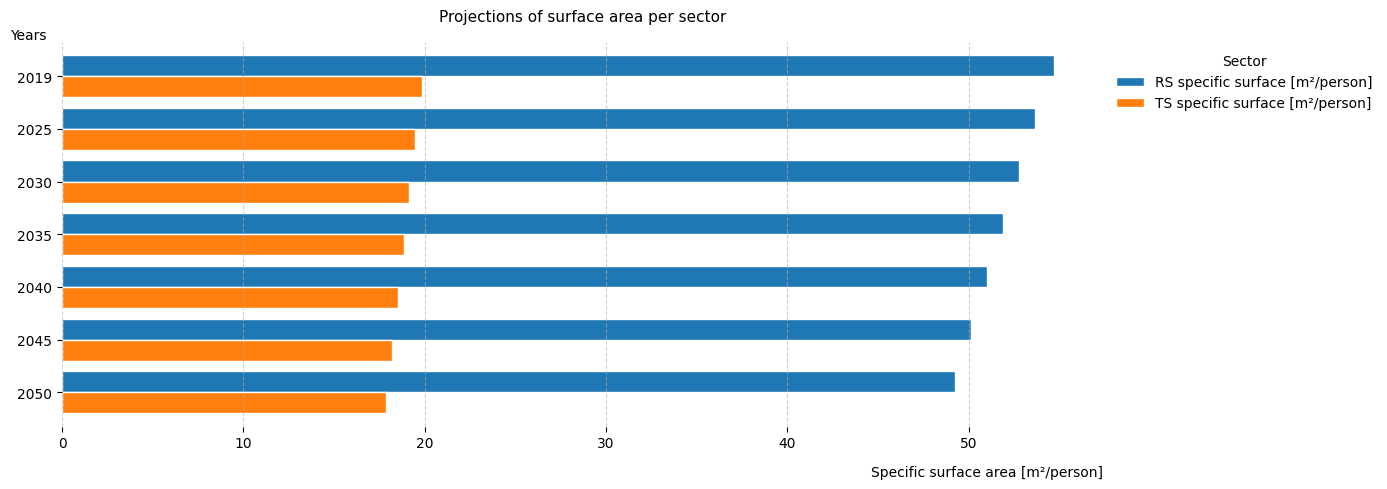

In [7]:
if post_process:
    # === Full table ===
    df_fec = df_BD_macro
    df_fec['Sector'] = df_fec['Sector'].mask(df_fec['Sector'].duplicated(), '')
    df_fec_r = df_fec[['Sector', 'Parameter'] + list(years)]
    styled = (
        df_fec_r.style
          .hide(axis='index')
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Sector'], col) for col, cell in zip(df_fec_r.columns, row)], axis=1)
          .set_properties(subset=['Parameter'], **{'font-style':'italic'})
          .format({year: "{:.3f}" for year in years})
    )
    display(styled)

    # === Bar chart ===
    plot_data = df_BD_macro.set_index('Parameter')[years].T
    plot_data = plot_data[['RS specific surface [m²/person]', 'TS specific surface [m²/person]']]
    ax = plot_data.plot(
        kind='barh',
        figsize=(14, 5), 
        width=0.8,
        edgecolor='white'
        )
    ax.set_title('Projections of surface area per sector', fontsize=11, pad=15)
    ax.set_xlabel('Specific surface area [m²/person]', fontsize=10, ha='right', va='top')
    ax.set_ylabel('Years', fontsize=10, rotation=0, ha='left', va='bottom') 
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Sector", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tight_layout()
    plt.show()


---

<font size="5"><b>2. Residential Sector</b></font> <a class="anchor" id="section_2"></a>

---

This section defines the end-use energy demand for each energy carrier in the residential sector.



---

<font size="4"><b>2.1. Thermal Uses</b></font> <a class="anchor" id="section_2_1"></a>

---

The distribution of the different energy services for thermal uses for the reference year in the residential sector is from JRC-IDEES [1,2]. The values are reported to different parameters, as different scaling and projection rules will be applied:
 * *Space heating:* reported to average household surface area [kWh/m²], as proportional to this quantity (regardless of the number of inhabitants).
 * *Space cooling:* reported to average household surface area [kWh/m²], as proportional to this quantity (regardless of the number of inhabitants).
 * *Sanitary hot water:* reported to population [kWh/person], as proportional to this quantity (showering is the main driver).
 * *Cooking:* reported to number households [kWh/household], as proportional to this quantity (cooking for the whole household).


In [8]:
# Inputs - Repartition of the thermal energy services (TES) in residential buildings for the reference year (2019)
ref_RS_tes_sht = 3664.049*ktoe_to_GWh*1e+6/ref_RS_sur_tot # [kWh/m²]
ref_RS_tes_scl =   23.455*ktoe_to_GWh*1e+6/ref_RS_sur_tot # [kWh/m²]
ref_RS_tes_shw =  663.435*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_RS_tes_cok =   96.395*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
if post_process:
    print(f'Energy service for space heating: {round(ref_RS_tes_sht,3)} kWh/m²')
    print(f'Energy service for space cooling:  {round(ref_RS_tes_scl,3)} kWh/m²')
    print(f'Energy service for hot water:    {round(ref_RS_tes_shw,3)} kWh/person')
    print(f'Energy service for cooking:      {round(ref_RS_tes_cok,3)} kWh/household')

Energy service for space heating: 68.155 kWh/m²
Energy service for space cooling:  0.436 kWh/m²
Energy service for hot water:    674.961 kWh/person
Energy service for cooking:      226.553 kWh/household



---

<font size="3"><b>2.1.1. Building Energy Performance</b></font> <a class="anchor" id="section_2_1_1"></a>

---

The energy performance of a building, generally expressed in kWh/m², is a key factor in reducing its total end-use energy demand. While many energy models distinguish this performance according to three categories within the building stock (existing, renovated, and new-built), thus allowing the direct modelling of the effect of the renovation rate of the stock, we favor a simplified approach that evaluates only the average performance of the overall building stock.

According to figures from JRC-IDEES [1,2], the average annual renewal rate of floor area (renovation + new construction) was around 3% between 2000 and 2023, with the associated reduction in end-use demand averaging -0,458 kWh/m²/year. We mainly attribute this decrease to efficiency measures (insulation), although some episodic reductions may also have been linked to sufficiency measures (reduced heating use during energy crises, etc.).

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

We believe that the average annual improvement rate over the 2000-2023 period is too low to meet climate objectives. We therefore propose to double it in order to accelerate the energy transition. With this improvement rate of -0,916 kWh/m²/year, the efficiency-related building performance improves from 68,2 kWh/m² in 2019 to 39,8 kWh/m² in 2050.


In [9]:
acc_RS_tes_sht_ren = 2
cur_RS_tes_sht_ren = -0.458 # kWh/m²/year
trg_RS_tes_sht     = ref_RS_tes_sht + acc_RS_tes_sht_ren*cur_RS_tes_sht_ren*(2050-2019) # [kWh/m²]


---

<font size="3"><b>2.1.2. Behavioural Aspects</b></font> <a class="anchor" id="section_2_1_2"></a>

---

Next to efficiency measures, the end-use energy demand can also be reduced through behavioural changes. These are introduced below.

**Space heating** 

The adoption of *SlowHeat* [3], which consists of voluntarily lowering heating temperature setpoints in favor of localised heating close to the body (appropriate clothing, electric blankets, heated garments, etc.), makes it possible to significantly reduce heat demand. A study conducted in Belgium indicates that an average indoor temperature of 15°C can be entirely acceptable and desirable, while the vigilance threshold appears to be around 12°C [3].

This practice nevertheless faces significant social and psychological resistance (in 2022, 19°C often constituted a lower bound), which makes its widespread adoption rather unrealistic.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

We estimate that by 2050, the evolution of social norms will allow average **heating setpoints** to be reduced by **-2°C**. Given that models indicate a -7% reduction in consumption for each -1°C decrease [3], we estimate an additional -14% reduction on top of the efficiency measures described above. This results in a heat demand of **34,2 kWh/m²** in 2050.


In [10]:
d_cons_temp = 0.07
d_temp = 2
suf_RS_tes_sht = 1-d_temp*d_cons_temp
if post_process:
    print(f'Evolution of space heating energy demand: {round(-(1-(trg_RS_tes_sht*suf_RS_tes_sht)/(ref_RS_tes_sht))*100,1)}% [kWh/m²]')
    print(f' -> By 2019, the annual heating energy demand is {round(ref_RS_tes_sht,               2)} kWh/m²')
    print(f' -> By 2050, the annual heating energy demand is {round(trg_RS_tes_sht*suf_RS_tes_sht,2)} kWh/m²')

Evolution of space heating energy demand: -49.8% [kWh/m²]
 -> By 2019, the annual heating energy demand is 68.15 kWh/m²
 -> By 2050, the annual heating energy demand is 34.19 kWh/m²



> **Comment:** Should maybe add a bit of electricity to other electric appliances for SlowHeat devices.

**Space cooling** 

Cooling demand increased by a factor of x22,5 between 2000 and 2023, rising from 0,035 kWh/m² to 1,010 kWh/m².
The most striking expansion occurred between 2019 and 2023, during which demand increased by +0,572 kWh/m² in just four years.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

Due to climate change, we acknowledge that the deployment of air conditioning is becoming a necessity to ensure a decent quality of life across a range of applications. However, we believe that its deployment can be controlled and restricted to cases where it is genuinely necessary. The current trend of expanding the use of air conditioning in order to increase self-consumption in buildings equipped with photovoltaic panels does not, in our view, support the energy transition, as this solar potential (already limited in Belgium) could be used for other purposes (such as the production and seasonal storage of heat, etc.).

As a sufficiency assumption, we project that the rate of **deployment** of residential **air conditioning** over the period 2019-2050 will be the **same** as over the **historical period** (+0,035 kWh/m²/year).

In [11]:
acc_RS_tes_scl_ren = 1
cur_RS_tes_scl_ren = 0.035 # kWh/m²/year
trg_RS_tes_scl     = ref_RS_tes_scl + acc_RS_tes_scl_ren*cur_RS_tes_scl_ren*(2050-2019) # [kWh/m²]
if post_process:
    print(f'Evolution of space cooling energy demand: +{round(-(1-(trg_RS_tes_scl)/(ref_RS_tes_scl))*100,1)}% [kWh/m²]')
    print(f' -> By 2019, the annual cooling energy demand is {round(ref_RS_tes_scl,2)} kWh/m²')
    print(f' -> By 2050, the annual cooling energy demand is {round(trg_RS_tes_scl,2)} kWh/m²')

Evolution of space cooling energy demand: +248.7% [kWh/m²]
 -> By 2019, the annual cooling energy demand is 0.44 kWh/m²
 -> By 2050, the annual cooling energy demand is 1.52 kWh/m²


**Sanitary hot water**

By 2019, the specific annual energy consumption for hot water is of about 675 kWh/person. This is equivalent to about 64 l of 40°C water per day and per person.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

We project to limit the hot water consumption for showering to sufficient levels. We therefore assume one shower per day and per person, 5 min long shower (sinking water) with 38°C water at 7 l/min. We also consider a daily use of 10 l of 60°C hot water for other domestic purposes (doing the dish, etc.). 

All in all, the specific energy consumption by 2050 is reduced by **-21%** compared with 2019. This is equivalent to **50 l** of **40°C per day** and **per person**.

In [12]:
# Inputs - Define Sufficiency Scenario Data (SUF)
shower_duration    = 5 # [min]
shower_flow_rate   = 7 # [l/min]
shower_temperature = 38 # [°C]
shower_energy      = shower_duration*shower_flow_rate*rho_h2o*cp_h2o*(shower_temperature-15) # [kWh/shower]
others_volume      = 10 # [l]
others_temperature = 60 # [°C]
others_energy      = others_volume*rho_h2o*cp_h2o*(others_temperature-15) # [kWh]
# Outputs - Sufficiency Scenario Data (SUF)
trg_RS_tes_shw     = (shower_energy+others_energy)*365
pro_RS_tes_shw     = (trg_RS_tes_shw-ref_RS_tes_shw)/ref_RS_tes_shw
if post_process:
    print(f'Evolution of sanitary hot water energy demand: {round(pro_RS_tes_shw*100,1)}% [kWh/person]')
    amount_2019 = ref_RS_tes_shw/(rho_h2o*cp_h2o*(40-15))/365 # equivalent l/day/person of 40°C water
    amount_2050 = trg_RS_tes_shw/(rho_h2o*cp_h2o*(40-15))/365 # equivalent l/day/person of 40°C water
    print(f' -> By 2019, the equivalent energy demand is {round(amount_2019,1)} liters of 40°C water per day and per person')
    print(f' -> By 2050, the equivalent energy demand is {round(amount_2050,1)} liters of 40°C water per day and per person')

Evolution of sanitary hot water energy demand: -21.2% [kWh/person]
 -> By 2019, the equivalent energy demand is 63.7 liters of 40°C water per day and per person
 -> By 2050, the equivalent energy demand is 50.2 liters of 40°C water per day and per person



**Cooking**

The historical average trend shows a slight decrease in energy consumption for cooking (-1,6 kWh per household per year between 2000 and 2023). This could be explained by changes in cooking habits and the increased purchase of processed foods.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

In our scenario, we advocate more home cooking using less processed products. We therefore anticipate a +15% increase in energy consumption related to cooking per household.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

In addition, in order to limit greenhouse gas emissions, we prioritise the use of **electric cookers** and **ovens**. Nevertheless, we retain a **2%** share of **gas cooking** by 2050.


In [13]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_RS_tes_cok     = 0.15
ref_RS_tes_cok_gas = (3.846+21.957)/96.395 # ktoe_gas/ktoe_tot (from JRC-IDEES)
trg_RS_tes_cok_gas = 0.02
# Outputs - Sufficiency Scenario Data (SUF)
trg_RS_tes_cok = (1+pro_RS_tes_cok)*ref_RS_tes_cok # kWh/person
share_cook_gas = linear_growth(2019,  ref_RS_tes_cok_gas,
                               2050,  trg_RS_tes_cok_gas,years) # [%]
share_cook_ele = linear_growth(2019,1-ref_RS_tes_cok_gas,
                               2050,1-trg_RS_tes_cok_gas,years) # [%]
print(f'Evolution of cooking energy demand: {round(pro_RS_tes_cok*100,1)}% [kWh/household]')
print(f' -> By 2019, the equivalent energy demand is {round(ref_RS_tes_cok,2)} kWh per household')
print(f' -> By 2050, the equivalent energy demand is {round(trg_RS_tes_cok,2)} kWh per household')

Evolution of cooking energy demand: 15.0% [kWh/household]
 -> By 2019, the equivalent energy demand is 226.55 kWh per household
 -> By 2050, the equivalent energy demand is 260.54 kWh per household



---

<font size="3"><b>2.1.3. Centralisation Degree</b></font> <a class="anchor" id="section_2_1_3"></a>

---

District heating networks are a key technological option for the energy transition. They enable effective decarbonisation of the heating sector by providing a large-scale source of sector coupling (use of industrial heat pumps with decarbonised sources such as geothermal energy, waste heat, biomass cogeneration, etc.) and a significant source of flexibility (buffer and seasonal thermal storage).

Nevertheless, the penetration of district heating networks is currently anecdotal in Belgium, covering less than 1% of total demand.
Although studies indicate that their techno-economic potential by 2050 could reach up to 45% of total heating demand in the residential sector [4], it is unlikely that this potential will be fully exploited.
For example, the PATHS2050 scenario from EnergyVille assumes a 13% coverage in the building sector (residential and tertiary) [5].

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

In our scenario, we assume a significant deployment of **district heating networks**, covering **15%** of end-use heat demand in buildings by **2050**.

Also, we exclude district cooling networks from our model.


In [14]:
ref_RS_tes_dhn = 10.823/(3664.049+663.435) # [%] 2019 reference share of district heating network in Belgium from JRC-IDEES
trg_RS_tes_dhn = 0.15                      # [%] 2050 target    share of district heating network in Belgium from nW-BE
share_heat_dhn = linear_growth(2019,  ref_RS_tes_dhn,
                               2050,  trg_RS_tes_dhn,years) # [%]
share_heat_ihs = linear_growth(2019,1-ref_RS_tes_dhn,
                               2050,1-trg_RS_tes_dhn,years) # [%]


---

<font size="4"><b>2.2. Specific Electrical Uses</b></font> <a class="anchor" id="section_2_2"></a>

---

The distribution of the different energy services for specific electrical uses for the reference year in the residential sector is from JRC-IDEES [1,2]. The values are reported to the number of households.


In [15]:
# Inputs - Repartition of the electrical energy services (EES) in residential buildings for the reference year (2019)
ref_RS_ees_frg = 209.814*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_wsh =  64.045*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_dry =  73.446*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_dsh =  59.199*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_tvm = 257.507*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_ict =  96.860*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_lgt = 139.889*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
ref_RS_ees_oth =  97.004*ktoe_to_GWh*1e+6/df_SUF["households [household]"][2019] # [kWh/household]
if post_process:
    print(f'Energy service for refrigeration:    {round(ref_RS_ees_frg,3)} kWh/household')
    print(f'Energy service for washing machines: {round(ref_RS_ees_wsh,3)} kWh/household')
    print(f'Energy service for clothes dryer:    {round(ref_RS_ees_dry,3)} kWh/household')
    print(f'Energy service for dish washer:      {round(ref_RS_ees_dsh,3)} kWh/household')
    print(f'Energy service for TV and multimedia:{round(ref_RS_ees_tvm,3)} kWh/household')
    print(f'Energy service for ICT:              {round(ref_RS_ees_ict,3)} kWh/household')
    print(f'Energy service for lights:           {round(ref_RS_ees_lgt,3)} kWh/household')
    print(f'Energy service for others:           {round(ref_RS_ees_oth,3)} kWh/household')

Energy service for refrigeration:    493.117 kWh/household
Energy service for washing machines: 150.522 kWh/household
Energy service for clothes dryer:    172.617 kWh/household
Energy service for dish washer:      139.133 kWh/household
Energy service for TV and multimedia:605.207 kWh/household
Energy service for ICT:              227.646 kWh/household
Energy service for lights:           328.775 kWh/household
Energy service for others:           227.984 kWh/household



**Refrigeration**

Following projections from the European Commission Ecodesign Impact Accounting 2024 report [6], the specific annual consumption of new housholds refrigeration units should be below 100 kWh/year by 2035. 
Historical data show that the average consumption associated with refrigeration has decreased almost linearly by -17,0 kWh/household/year from 2000 to 2023 [1,2].

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

We project an average value of **150 kWh/household** for the entire fleet starting from **2040**.

In [16]:
trg_RS_ees_frg = 150 # [kWh/household]
yea_RS_ees_frg = 2040
#2019+(ref_RS_ees_frg-trg_RS_ees_frg)/(16.967)


> **Comment:** For complementary info regarding the target, see this EU labels (https://energy-efficient-products.ec.europa.eu/product-list/fridges-and-freezers_en)

**Washing machines**

Following projections from the European Commission Ecodesign Impact Accounting 2024 report [6], the specific annual consumption of new housholds washing machines should be below 100 kWh/year by 2025. 
Historical data show that the average consumption associated with washing machines has decreased almost linearly by -6,3 kWh/household/year from 2000 to 2023 [1,2], mainly driven by a reduction in water consumption per cycle and water temperature (90 l at 56°C in 1990 against 36 l at 40°C in 2020) [6].

<br/>
$\textcolor{Orange}{\textbf{Combined Efficiency and Sufficiency Assumption}}$

According to the European Commission Ecodesign Impact Accounting 2024 report [6], the average performance of newsold washing machines should be around 96 kWh/year by 2030.
In our scenario, we project widespread use of eco programmes (30°C and less water). We therefore estimate that average annual consumption will reach **90 kWh/household** by **2030**.


In [17]:
trg_RS_ees_wsh = 90 # [kWh/household]
yea_RS_ees_wsh = 2030
#2019+(ref_RS_ees_wsh-trg_RS_ees_wsh)/(6.277)


> **Comment:** For complementary info regarding the target, see this EU labels (https://energy-efficient-products.ec.europa.eu/product-list/washing-machines_en)

**Laundry dryers**

Following projections from the European Commission Ecodesign Impact Accounting 2024 report [6], the specific annual consumption of new housholds laundry dryers should be around 100 kWh/year by 2030. 
Historical data show that the average consumption associated with laundry dryers has decreased by -4,2 kWh/household/year from 2000 to 2023 [1,2], mainly driven by (i) the deployement of condensing electrical units and (ii) condensing heat pumps units (from approx. 2010) [6].

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

We project that the fleet will gradually shift from vented and condensing electric to condensing heat pumps (most efficient).

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As these are energy intensive units, our scenario also projects to **limit their usage** and priviliege natural passive drying whenever possible.
We expect to reach an average annual consumption of **80 kWh/household** by **2040**.


In [18]:
trg_RS_ees_dry = 80 # [kWh/household]
yea_RS_ees_dry = 2040
# 2019+(ref_RS_ees_dry-trg_RS_ees_dry)/(4.17)


> **Comment:** For complementary info regarding the target, see this EU labels (https://energy-efficient-products.ec.europa.eu/product-list/tumble-dryers_en)

**Dishwashers**

Following projections from the European Commission Ecodesign Impact Accounting 2024 report [6], the specific annual consumption of new housholds dishwashers should be below 160 kWh/year by 2030, mainly driven by a reduction in water consumption per cycle (30 l in 1990 against 9 l in 2030).
However, historical data show that the average consumption associated with dishwashers has increased by +0,35 kWh/household/year from 2000 to 2023, as the technology continues its deployement (all households are not equiped yet) [1,2].

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

We project that the technology will continue developping as it contributes to increasing the quality of life. We assume a constant (energy) deployement rate. By 2050, we hence project a **150 kWh/household** consumption.


In [19]:
trg_RS_ees_dsh =  150 # [kWh/household]
yea_RS_ees_dsh = 2050
#2019+(ref_RS_ees_dsh-trg_RS_ees_dsh)/(-0.351)


> **Comment:** For complementary info regarding the target, see this EU labels (https://energy-efficient-products.ec.europa.eu/product-list/dishwashers_en)


**TV and multimedia**

Consumption related to TV and multimedia equipment grew until around 2015 [1,2]. Since then, there has been a slow decline in this area of consumption, undoubtedly due to increased energy efficiency. For example, the specific consumption of new screens has fallen from around 7,5 W/dm² in 2000 to nearly 1 W/m² in 2020 [6].

As we do not have any usage data at our disposal, it is difficult to say whether the decline observed since 2015 is due to decoupling (increased usage offset by efficiency gains) or to a coupled effect (stabilisation or even a decrease in usage combined with efficiency gains). 
Nevertheless, the rate of efficiency gains appears to be much faster than the rate of decline in energy consumption, which seems to reinforce the decoupling hypothesis.

<br/>
$\textcolor{Orange}{\textbf{Combined Efficiency and Sufficiency Assumption}}$

Projections from the European Commission Ecodesign Impact Accounting 2024 report [6] indicate that the specific consumption of new screens could be halved between 2020 and 2030.
We anticipate a slowdown in the growth of demand for TV and multimedia. Combined with efficiency gains, we project that electricity demand for this category could be reduced by **-30%** by **2050**.


In [20]:
trg_RS_ees_tvm = (1-0.3)*ref_RS_ees_tvm # [kWh/household]
yea_RS_ees_tvm = 2050

**ICT equipment**

ICT-related consumption grew until around 2021, but seems to have stabilised since then [1,2].

<br/>
$\textcolor{Orange}{\textbf{Combined Efficiency and Sufficiency Assumption}}$

We project that the combined effect of slower demand growth and efficiency gains will stabilise consumption in this area.


In [21]:
trg_RS_ees_ict = ref_RS_ees_ict # [kWh/household]
yea_RS_ees_ict = 2019

**Lighting**

Following projections from the European Commission Ecodesign Impact Accounting 2024 report [6], the specific annual consumption of lighting systems should be around 130 kWh/household/year by 2030 in EU27. Historical data show that the average consumption associated with lighting has decreased by -12,9 kWh/household/year from 2000 to 2023 [1,2] despite the rebund effect (from 22 light sources per houshold in 2005 to 29 in 2015 [6]).

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

Thanks to the continuous technological improvement, we expect to reach a consumption of 130 kWh/household by 2035.


In [22]:
trg_RS_ees_lgt = 130 # [kWh/household]
yea_RS_ees_lgt = 2035
# 2019+(ref_RS_ees_lgt-trg_RS_ees_lgt)/(12.853)


> **Comment:** For complementary info regarding the target, see this EU labels (https://energy-efficient-products.ec.europa.eu/product-list/light-sources_en)


**Other appliances**

The consumption associated to other appliances, accounting for vacuum cleaners, irons, etc., is expected to remain constant.

In [23]:
trg_RS_ees_oth = ref_RS_ees_oth # [kWh/household]
yea_RS_ees_oth = 2019


---

<font size="4"><b>2.3. Global Data Processing</b></font> <a class="anchor" id="section_2_3"></a>

---


-> Relative difference to JRC-IDEES for thermal services: -0.001%


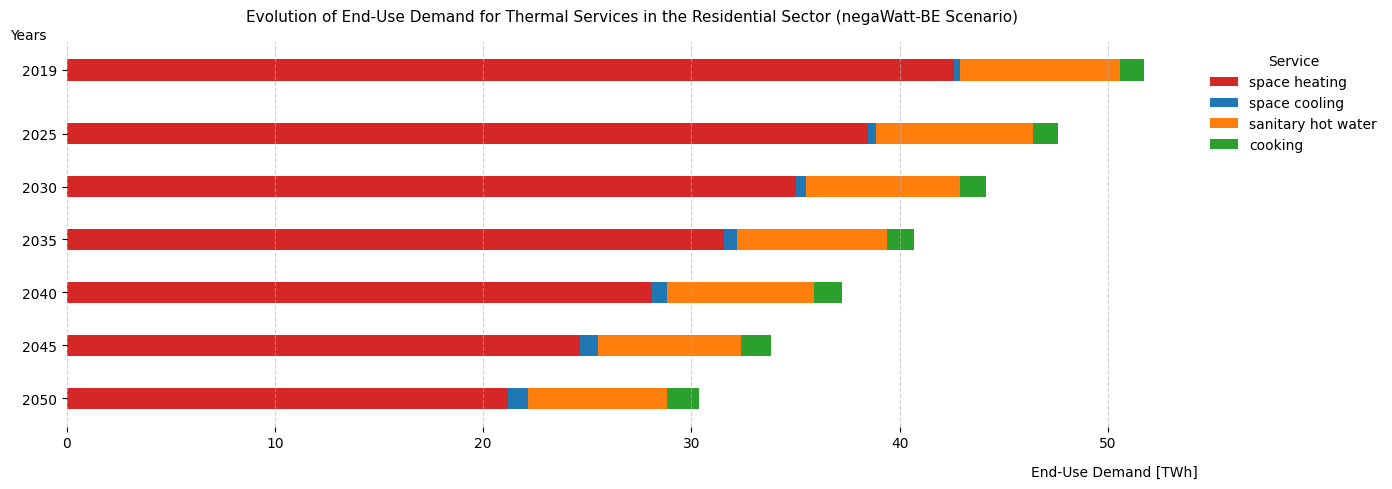

In [24]:
# Residential Sector - Thermal Energy Services
tes_RS_tot = {
    'space heating':      linear_growth(2019,ref_RS_tes_sht               *df_SUF["RS total surface [Mm²]"][2019]*1e-3,
                                        2050,trg_RS_tes_sht*suf_RS_tes_sht*df_SUF["RS total surface [Mm²]"][2050]*1e-3,years), # [TWh] kWh/m² * m²
    'space cooling':      linear_growth(2019,ref_RS_tes_scl               *df_SUF["RS total surface [Mm²]"][2019]*1e-3,
                                        2050,trg_RS_tes_scl               *df_SUF["RS total surface [Mm²]"][2050]*1e-3,years), # [TWh] kWh/m² * m²
    'sanitary hot water': linear_growth(2019,ref_RS_tes_shw               *df_SUF["population [person]"]   [2019]*1e-9,
                                        2050,trg_RS_tes_shw               *df_SUF["population [person]"]   [2050]*1e-9,years), # [TWh] kWh/person * person 
    'cooking':            linear_growth(2019,ref_RS_tes_cok               *df_SUF["households [household]"][2019]*1e-9,
                                        2050,trg_RS_tes_cok               *df_SUF["households [household]"][2050]*1e-9,years), # [TWh] kWh/household * household
    }
if post_process:
    total_TWh  = sum(val[0] for val in tes_RS_tot.values())
    total_ktoe = total_TWh*1e+3/ktoe_to_GWh
    print(f'-> Relative difference to JRC-IDEES for thermal services: {round(100*(4447.334-total_ktoe)/4447.334,3)}%')
    # === PLOT ===
    df_tes_RS_tot = pd.DataFrame(tes_RS_tot, index=years)
    dfts = df_tes_RS_tot
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfts))
    colors = ['tab:red','tab:blue','tab:orange','tab:green']
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, activity in enumerate(dfts.columns):
        ax.barh(dfts.index, dfts[activity],
                left=bottom, label=activity,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfts[activity]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Thermal Services in the Residential Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Service", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()

-> Relative difference to JRC-IDEES for electrical services: 0.009%


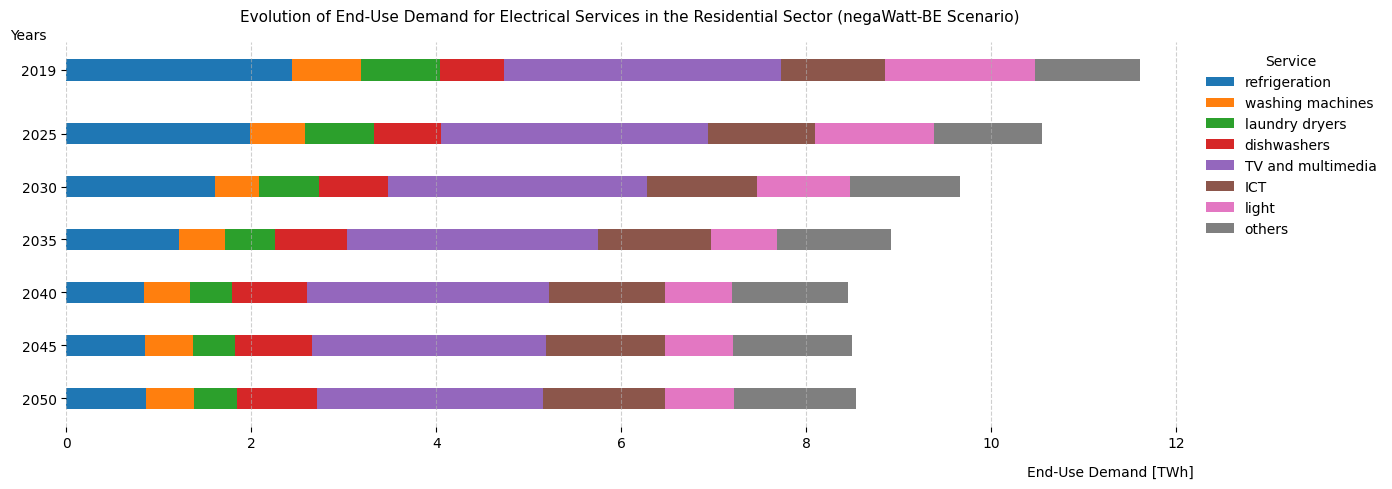

In [25]:
# Residential Sector - Electrical Energy Services
ees_RS_tot = {
    'refrigeration':      linear_with_middle_point(2019,ref_RS_ees_frg*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_frg,trg_RS_ees_frg*df_SUF["households [household]"][yea_RS_ees_frg]*1e-9, 
                                                   2050,trg_RS_ees_frg*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'washing machines':   linear_with_middle_point(2019,ref_RS_ees_wsh*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_wsh,trg_RS_ees_wsh*df_SUF["households [household]"][yea_RS_ees_wsh]*1e-9, 
                                                   2050,trg_RS_ees_wsh*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'laundry dryers':     linear_with_middle_point(2019,ref_RS_ees_dry*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_dry,trg_RS_ees_dry*df_SUF["households [household]"][yea_RS_ees_dry]*1e-9, 
                                                   2050,trg_RS_ees_dry*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'dishwashers':        linear_with_middle_point(2019,ref_RS_ees_dsh*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_dsh,trg_RS_ees_dsh*df_SUF["households [household]"][yea_RS_ees_dsh]*1e-9, 
                                                   2050,trg_RS_ees_dsh*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'TV and multimedia':  linear_with_middle_point(2019,ref_RS_ees_tvm*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_tvm,trg_RS_ees_tvm*df_SUF["households [household]"][yea_RS_ees_tvm]*1e-9, 
                                                   2050,trg_RS_ees_tvm*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'ICT':                linear_with_middle_point(2019,ref_RS_ees_ict*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_ict,trg_RS_ees_ict*df_SUF["households [household]"][yea_RS_ees_ict]*1e-9, 
                                                   2050,trg_RS_ees_ict*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'light':              linear_with_middle_point(2019,ref_RS_ees_lgt*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_lgt,trg_RS_ees_lgt*df_SUF["households [household]"][yea_RS_ees_lgt]*1e-9, 
                                                   2050,trg_RS_ees_lgt*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    'others':             linear_with_middle_point(2019,ref_RS_ees_oth*df_SUF["households [household]"][2019]          *1e-9, 
                                         yea_RS_ees_oth,trg_RS_ees_oth*df_SUF["households [household]"][yea_RS_ees_oth]*1e-9, 
                                                   2050,trg_RS_ees_oth*df_SUF["households [household]"][2050]          *1e-9, years), # [TWh] kWh/household * household
    }
if post_process:
    total_TWh  = sum(val[0] for val in ees_RS_tot.values())
    total_ktoe = total_TWh*1e+3/ktoe_to_GWh
    print(f'-> Relative difference to JRC-IDEES for electrical services: {round(100*(997.764-total_ktoe)/997.764,3)}%')
    # === PLOT ===
    df_ees_RS_tot = pd.DataFrame(ees_RS_tot, index=years)
    dfes = df_ees_RS_tot
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfes))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, activity in enumerate(dfes.columns):
        ax.barh(dfes.index, dfes[activity],
                left=bottom, label=activity,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfes[activity]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Electrical Services in the Residential Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Service", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()


> **Comment:** Could compare to PATHS2050 (https://perspective2050.energyville.be/sites/paths2050/files/inline-files/Full-Fledged%20Report_1.pdf).


In [26]:
# End-Use Demand: thermal and electical
tes_RS_tot['heat_ihs']   = [(x+y)*z for x,y,z in zip(tes_RS_tot['space heating'], tes_RS_tot['sanitary hot water'], share_heat_ihs)]
tes_RS_tot['heat_dhn']   = [(x+y)*z for x,y,z in zip(tes_RS_tot['space heating'], tes_RS_tot['sanitary hot water'], share_heat_dhn)]
tes_RS_tot['cooking_ng'] = [ x*y    for x,y   in zip(tes_RS_tot['cooking'],                                         share_cook_gas)]
tes_RS_tot['cooking_el'] = [ x*y    for x,y   in zip(tes_RS_tot['cooking'],                                         share_cook_ele)]
df_tes_RS_tot = pd.DataFrame(tes_RS_tot, index=years) # [TWh]
df_ees_RS_tot = pd.DataFrame(ees_RS_tot, index=years) # [TWh]
# End-Use Demand: carrier distribution
df_eud_RS_tot_car = {
    'heat-ihs':    df_tes_RS_tot[["heat_ihs"]].T,
    'heat-dhn':    df_tes_RS_tot[["heat_dhn"]].T,
    'cold':        df_tes_RS_tot[["space cooling"]].T,
    'electricity': pd.concat([df_tes_RS_tot[["cooking_el"]], df_ees_RS_tot], axis=1).T,
    'fuel-gas':    df_tes_RS_tot[["cooking_ng"]].T,
    }
rows = []
for carrier, df in df_eud_RS_tot_car.items():
    temp = df.copy()
    temp['Carrier'] = carrier
    temp['Activity'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_eud_RS_tot_car = pd.concat(rows, ignore_index=True)
# Carriers distribution - aggregated per carrier
df_eud_RS_tot_cln = df_eud_RS_tot_car.groupby('Carrier')[years].sum()
df_eud_RS_tot_cln = df_eud_RS_tot_cln.reset_index()
# Carriers distribution - normalisations
divider_series = df_SUF["households [household]"]
divider_series.index = divider_series.index.astype(float)
df_eud_RS_hsd_car = (df_eud_RS_tot_car[years].div(divider_series, axis=1))*1e+9
df_eud_RS_hsd_car[['Carrier', 'Activity']] = df_eud_RS_tot_car[['Carrier', 'Activity']]

Carrier,Activity,Unit,2019,2025,2030,2035,2040,2045,2050
cold,space cooling,TWh,0.273,0.403,0.511,0.619,0.727,0.835,0.944
,,kWh/household,55.169,77.505,95.423,112.752,129.597,146.419,163.580
electricity,ICT,TWh,1.126,1.163,1.193,1.223,1.253,1.284,1.314
,,kWh/household,227.548,223.668,222.777,222.772,223.363,225.152,227.695
,TV and multimedia,TWh,2.995,2.888,2.800,2.711,2.622,2.534,2.445
,,kWh/household,605.246,555.420,522.864,493.813,467.405,444.342,423.680
,cooking_el,TWh,0.821,0.932,1.031,1.133,1.242,1.355,1.474
,,kWh/household,165.826,179.261,192.477,206.465,221.402,237.686,255.407
,dishwashers,TWh,0.688,0.723,0.751,0.780,0.808,0.837,0.866
,,kWh/household,139.035,139.047,140.240,142.078,144.036,146.770,150.064


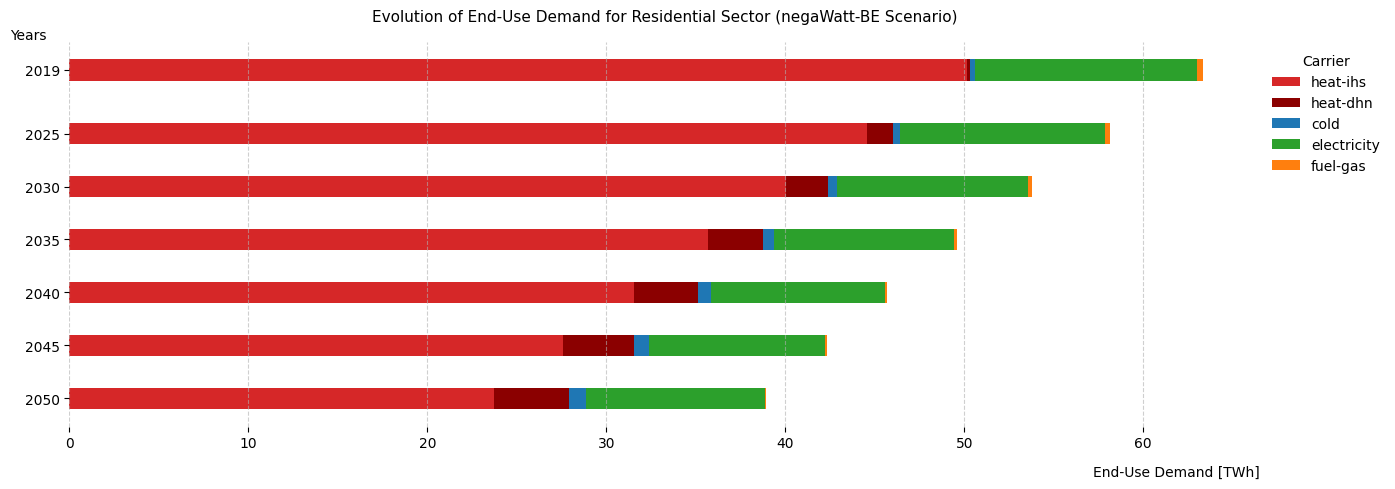

In [27]:
if post_process:
    # === Table with values ===
    df_abs = df_eud_RS_tot_car.set_index(['Carrier', 'Activity'])[years]
    df_rel = df_eud_RS_hsd_car.set_index(['Carrier', 'Activity'])[years]
    df_abs['Unit'] = 'TWh'
    df_rel['Unit'] = 'kWh/household'
    df_combined = pd.concat([df_abs, df_rel]).set_index('Unit', append=True)
    df_combined = df_combined.sort_index(level=['Carrier', 'Activity'], sort_remaining=False)
    df_final = df_combined.reset_index()
    df_final['Carrier'] = df_final['Carrier'].mask(df_final['Carrier'].duplicated(), '')
    df_final['Activity'] = df_final['Activity'].mask(df_final['Activity'].duplicated(), '')
    styled = (
        df_final.style
        .hide(axis='index')
        .apply(highlight_mode_separator, axis=1)
        .set_properties(subset=['Unit'], **{'font-size': '85%', 'color': 'gray'})
        .set_properties(subset=['Activity'], **{'font-style':'italic'})
        .format({year: "{:.3f}" for year in years})
        .set_table_attributes('style="width:100%;table-layout:fixed;"')
        .apply(lambda row: [bold_mode(cell, row['Carrier'], col) for col, cell in zip(df_final.columns, row)], axis=1)
    )
    display(styled)   
    # === Breakdown bar chart ===
    dfrs = df_eud_RS_tot_cln.set_index('Carrier').reindex(['heat-ihs', 'heat-dhn', 'cold', 'electricity', 'fuel-gas']).transpose()
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfrs))
    colors = ['tab:red','darkred','tab:blue','tab:green','tab:orange']
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, carrier in enumerate(dfrs.columns):
        ax.barh(dfrs.index, dfrs[carrier],
                left=bottom, label=carrier,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfrs[carrier]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Residential Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Carrier", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()


---

<font size="5"><b>3. Tertiary Sector</b></font> <a class="anchor" id="section_3"></a>

---

This section defines the end-use energy demand for each energy carrier in the tertiary sector.



---

<font size="4"><b>3.1. Thermal Uses</b></font> <a class="anchor" id="section_3_1"></a>

---

The distribution of the different energy services for thermal uses for the reference year in the tertiary sector is from JRC-IDEES [1,2]. The values are reported to different parameters, as different scaling and projection rules will be applied:

 * *Space heating:* reported to average household surface area [kWh/m²], as proportional to this quantity (regardless of the number of inhabitants).
 * *Space cooling:* reported to average household surface area [kWh/m²], as proportional to this quantity (regardless of the number of inhabitants).
 * *Sanitary hot water:* reported to population [kWh/person], as proportional to this quantity (showering is the main driver).
 * *Catering:* reported to population [kWh/person], as proportional to this quantity (meals a per person).


In [28]:
# Inputs - Repartition of the thermal energy services (TES) in tertiary buildings for the reference year (2019)
ref_TS_tes_sht = 1862.949*ktoe_to_GWh*1e+6/ref_TS_sur_tot # [kWh/m²]
ref_TS_tes_scl =  336.272*ktoe_to_GWh*1e+6/ref_TS_sur_tot # [kWh/m²]
ref_TS_tes_shw =  299.836*ktoe_to_GWh*1e+6/population_dict[2019] # [kWh/person]
ref_TS_tes_cat =  284.204*ktoe_to_GWh*1e+6/population_dict[2019] # [kWh/person]
if post_process:
    print(f'Energy service for space heating: {round(ref_TS_tes_sht,3)} kWh/m²')
    print(f'Energy service for space cooling: {round(ref_TS_tes_scl,3)} kWh/m²')
    print(f'Energy service for hot water:    {round(ref_TS_tes_shw,3)} kWh/person')
    print(f'Energy service for catering:     {round(ref_TS_tes_cat,3)} kWh/person')

Energy service for space heating: 95.415 kWh/m²
Energy service for space cooling: 17.223 kWh/m²
Energy service for hot water:    305.045 kWh/person
Energy service for catering:     289.141 kWh/person



---

<font size="3"><b>3.1.1. Building Energy Performance</b></font> <a class="anchor" id="section_3_1_1"></a>

---

As for the residental sector, our approach evaluates the average performance of the overall building stock.

According to figures from JRC-IDEES [1,2], the average annual renewal rate of floor area (renovation + new construction) was around 1,7% between 2000 and 2023, with the associated reduction in end-use demand averaging -0,154 kWh/m²/year. We mainly attribute this decrease to efficiency measures (insulation), although some episodic reductions may also have been linked to sufficiency measures (reduced heating use during energy crises, etc.).

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

We believe that the average annual improvement rate over the 2000-2023 period is too low to meet climate objectives. We therefore propose increase it fivefold in order to accelerate the energy transition. With this improvement rate of -0,77 kWh/m²/year, the efficiency-related building performance improves from 95,4 kWh/m² in 2019 to 71,5 kWh/m² in 2050.


In [29]:
acc_TS_tes_sht_ren = 5
cur_TS_tes_sht_ren = -0.154 # kWh/m²/year
trg_TS_tes_sht     = ref_TS_tes_sht + acc_TS_tes_sht_ren*cur_TS_tes_sht_ren*(2050-2019) # [kWh/m²]


---

<font size="3"><b>3.1.2. Behavioural Aspects</b></font> <a class="anchor" id="section_3_1_2"></a>

---

**Space heating** 

SlowHeat in the service sector has not yet been studied in depth, although research is underway.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

The adoption of SlowHeat in the tertiary sector seems even more subject to socio-psychological barriers than in the residential sector. The fear of a loss of attractiveness for commercial activities and disagreement among office staff are telling examples of this. We therefore plan to reduce the setpoint by only 1°C (compared to 2°C in the residential sector).
We hence estimate an additional -14% reduction on top of the efficiency measures described above. This results in a heat demand of 61,5 kWh/m² in 2050.


In [30]:
d_cons_temp = 0.07
d_temp = 1
suf_TS_tes_sht = 1-d_temp*d_cons_temp
if post_process:
    print(f'Evolution of space heating energy demand: {round(-(1-(trg_TS_tes_sht*suf_TS_tes_sht)/(ref_TS_tes_sht))*100,1)}% [kWh/m²]')
    print(f' -> By 2019, the annual heating energy demand is {round(ref_TS_tes_sht,               2)} kWh/m²')
    print(f' -> By 2050, the annual heating energy demand is {round(trg_TS_tes_sht*suf_RS_tes_sht,2)} kWh/m²')

Evolution of space heating energy demand: -30.3% [kWh/m²]
 -> By 2019, the annual heating energy demand is 95.41 kWh/m²
 -> By 2050, the annual heating energy demand is 61.53 kWh/m²



> **Comment:** From 2001 to 2023, we observed -0,154 kWh/m²/year on average. Yet, from 2021 to 2023, following energy crisis, we went from 102,6 kWh/m² to 78,6 kWh/m² (-19,3 kWh/m²/year). This shows that there is HUGE margin! And that reaching about 60 kWh/m² is more than realistic!



**Space cooling** 

Cooling demand increased by a factor of x9,7 between 2000 and 2019, rising from 1,8 kWh/m² to 17,2 kWh/m². From 2019 to 2022, the demand has stabilised and slightly decreased, probably due to the COVID-19 pandemic and the energy crisis.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

Due to climate change, we acknowledge that the deployment of air conditioning is becoming a necessity to ensure a decent quality of life across a range of applications. However, we believe that its deployment can be controlled and restricted to cases where it is genuinely necessary.

As a sufficiency assumption, we project that the rate of deployment of residential air conditioning over the period 2019-2050 will be equivalent to **one third** as over the historical period from 2000 to 2023 (+0,743 kWh/m²/year) and reach **24,9 kWh/m²** in **2050**.


In [31]:
acc_TS_tes_scl_ren = 1/3
cur_TS_tes_scl_ren = 0.743 # kWh/m²/year
trg_TS_tes_scl     = ref_TS_tes_scl + acc_TS_tes_scl_ren*cur_TS_tes_scl_ren*(2050-2019) # [kWh/m²]
if post_process:
    print(f'Evolution of space cooling energy demand: +{round(-(1-(trg_TS_tes_scl)/(ref_TS_tes_scl))*100,1)}% [kWh/m²]')
    print(f' -> By 2019, the annual cooling energy demand is {round(ref_TS_tes_scl,2)} kWh/m²')
    print(f' -> By 2050, the annual cooling energy demand is {round(trg_TS_tes_scl,2)} kWh/m²')

Evolution of space cooling energy demand: +44.6% [kWh/m²]
 -> By 2019, the annual cooling energy demand is 17.22 kWh/m²
 -> By 2050, the annual cooling energy demand is 24.9 kWh/m²



> **Comment:** Since COVID19 + 2022 energy crisis, stagnation (2019 was 17.3 kWh/m², while 2023 was 16.4 kWh/m²). Containing this is thus realistic!!!



**Sanitary hot water**

The demand for sanitary has continuously increased from 2000 to 2023 [1,2].

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As a sufficiency measure, we propose to contain the sanitary hot water demand to 2019 levels (305,0 kWh/person).

In [32]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_TS_tes_shw     = 0.00
# Outputs - Sufficiency Scenario Data (SUF)
trg_TS_tes_shw     = (1+pro_TS_tes_shw)*ref_TS_tes_shw # kWh/person
print(f'Evolution of sanitary hot water consumption: {round(pro_TS_tes_shw*100,1)}% [kWh/person]')
print(f' -> By 2019, the equivalent consumption is {round(ref_TS_tes_shw,2)} kWh per person')
print(f' -> By 2050, the equivalent consumption is {round(trg_TS_tes_shw,2)} kWh per person')

Evolution of sanitary hot water consumption: 0.0% [kWh/person]
 -> By 2019, the equivalent consumption is 305.04 kWh per person
 -> By 2050, the equivalent consumption is 305.04 kWh per person


**Catering**

While energy demand related to residential cooking decreased by -0,523 kWh/person/year from 2000 to 2023, it increased continuously by +4,297 kWh/person/year in the tertiary sector [1,2]. We project that this demand will have increased by a further 20% in 2050 compared to 2019.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

In addition, in order to limit greenhouse gas emissions, we prioritise the use of **electric cookers** and **ovens**. Nevertheless, we retain a 5% share of gas cooking by 2050, and we maintain the share of biomass (because we love wood-fired pizzas!).


In [33]:
# Inputs - Define Sufficiency Scenario Data (SUF)
pro_TS_tes_cat     = 0.20
ref_TS_tes_cat_gas = (8.421+106.309)/284.204 # ktoe_gas/ktoe_tot (from JRC-IDEES)
trg_TS_tes_cat_gas = 0.050
ref_TS_tes_cat_bio =          1.603 /284.204 # ktoe_bio/ktoe_tot (from JRC-IDEES)
trg_TS_tes_cat_bio = ref_TS_tes_cat_bio
# Outputs - Sufficiency Scenario Data (SUF)
trg_TS_tes_cat     = (1+pro_TS_tes_cat)*ref_TS_tes_cat # kWh/person
share_ctrg_gas = linear_growth(2019,  ref_TS_tes_cat_gas,
                               2050,  trg_TS_tes_cat_gas,years) # [%]
share_ctrg_bio = linear_growth(2019,  ref_TS_tes_cat_bio,
                               2050,  trg_TS_tes_cat_bio,years) # [%]
share_ctrg_ele = linear_growth(2019,1-ref_TS_tes_cat_gas-ref_TS_tes_cat_bio,
                               2050,1-trg_TS_tes_cat_gas-trg_TS_tes_cat_bio,years) # [%]
print(f'Evolution of catering consumption: {round(pro_TS_tes_cat*100,1)}% [kWh/person]')
print(f' -> By 2019, the equivalent consumption is {round(ref_TS_tes_cat,2)} kWh per person')
print(f' -> By 2050, the equivalent consumption is {round(trg_TS_tes_cat,2)} kWh per person')

Evolution of catering consumption: 20.0% [kWh/person]
 -> By 2019, the equivalent consumption is 289.14 kWh per person
 -> By 2050, the equivalent consumption is 346.97 kWh per person



---

<font size="3"><b>3.1.3. Centralisation Degree</b></font> <a class="anchor" id="section_3_1_3"></a>

---

En 2019, les réseaux de chaleur couvraient environ 2,4% de la demande dans le secteur tertiaire en Belgique.

<br/>
$\textcolor{Orange}{\textbf{Efficiency Assumption}}$

As with the residential sector, we project that 15% of demand will be covered by district heating networks in 2050.


In [34]:
ref_TS_tes_dhn = (46.381+5.984)/(1862.949+299.836) # [%] 2019 reference share of district heating network in Belgium from JRC-IDEES
trg_TS_tes_dhn = 0.15                              # [%] 2050 target    share of district heating network in Belgium from nW-BE
share_heat_dhn = linear_growth(2019,  ref_TS_tes_dhn,
                               2050,  trg_TS_tes_dhn,years) # [%]
share_heat_ihs = linear_growth(2019,1-ref_TS_tes_dhn,
                               2050,1-trg_TS_tes_dhn,years) # [%]


---

<font size="4"><b>3.2. Specific Electrical Uses</b></font> <a class="anchor" id="section_3_2"></a>

---


Distribution of different energy services for electrical uses the reference year


In [35]:
# Inputs - Repartition of the electrical energy services (EES) in tertiary buildings for the reference year (2019)
ref_TS_ees_vnt =  71.632*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_TS_ees_slt =  77.819*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_TS_ees_blt = 297.768*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_TS_ees_frg = 179.674*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_TS_ees_msc = 176.613*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
ref_TS_ees_ict = 248.983*ktoe_to_GWh*1e+6/df_SUF["population [person]"][2019] # [kWh/person]
print(f'Energy service for ventilation:      {round(ref_TS_ees_vnt,3)} kWh/person')
print(f'Energy service for street lighting:  {round(ref_TS_ees_slt,3)} kWh/person')
print(f'Energy service for building lighting:{round(ref_TS_ees_blt,3)} kWh/person')
print(f'Energy service for refrigeration:    {round(ref_TS_ees_frg,3)} kWh/person')
print(f'Energy service for miscellaneous:    {round(ref_TS_ees_msc,3)} kWh/person')
print(f'Energy service for ICT & multimedia: {round(ref_TS_ees_ict,3)} kWh/person')

Energy service for ventilation:      72.876 kWh/person
Energy service for street lighting:  79.171 kWh/person
Energy service for building lighting:302.941 kWh/person
Energy service for refrigeration:    182.795 kWh/person
Energy service for miscellaneous:    179.681 kWh/person
Energy service for ICT & multimedia: 253.308 kWh/person



**Ventilation and others**

rather stable for past 5 years

In [36]:
trg_TS_ees_vnt = ref_TS_ees_vnt # [kWh/person]

**Street lighting**

-0.476 kWh/person/year

In [37]:
trg_TS_ees_slt = ref_TS_ees_slt-0.476*(2050-2019) # [kWh/person]

**Building lighting**

In [38]:
trg_TS_ees_blt = 150 # [kWh/person]

**Commercial refrigeration**

stable

In [39]:
trg_TS_ees_frg = ref_TS_ees_frg # [kWh/person]

**Miscellaneous building technologies**

In [40]:
trg_TS_ees_msc = ref_TS_ees_msc # [kWh/person]

**ICT and multimedia** 

In [41]:
trg_TS_ees_ict = 1.10*ref_TS_ees_ict # [kWh/person]


---

<font size="4"><b>3.3. Global Data Processing</b></font> <a class="anchor" id="section_3_3"></a>

---


-> Relative difference to JRC-IDEES for thermal services: 0.001%


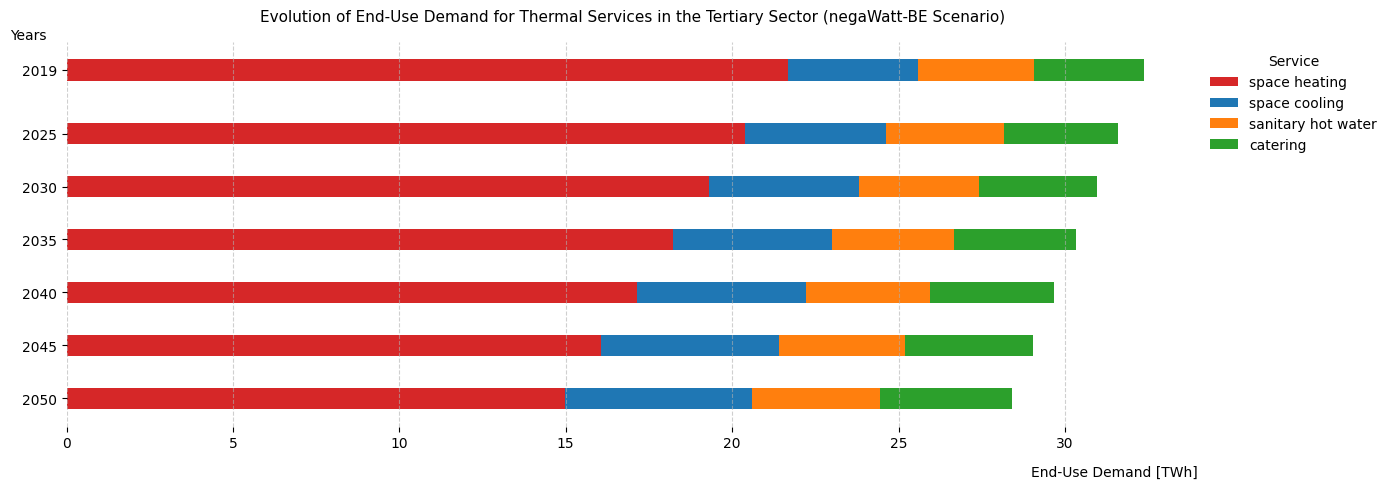

In [42]:
# Tertiary Sector - Thermal Energy Services
tes_TS_tot = {
    'space heating':      linear_growth(2019,ref_TS_tes_sht               *df_SUF["TS total surface [Mm²]"][2019]*1e-3,
                                        2050,trg_TS_tes_sht*suf_TS_tes_sht*df_SUF["TS total surface [Mm²]"][2050]*1e-3,years), # [TWh] kWh/m² * m²
    'space cooling':      linear_growth(2019,ref_TS_tes_scl               *df_SUF["TS total surface [Mm²]"][2019]*1e-3,
                                        2050,trg_TS_tes_scl               *df_SUF["TS total surface [Mm²]"][2050]*1e-3,years), # [TWh] kWh/m² * m²
    'sanitary hot water': linear_growth(2019,ref_TS_tes_shw               *df_SUF["population [person]"]   [2019]*1e-9,
                                        2050,trg_TS_tes_shw               *df_SUF["population [person]"]   [2050]*1e-9,years), # [TWh] kWh/person * person 
    'catering':           linear_growth(2019,ref_TS_tes_cat               *df_SUF["population [person]"]   [2019]*1e-9,
                                        2050,trg_TS_tes_cat               *df_SUF["population [person]"]   [2019]*1e-9,years), # [TWh] kWh/person * person
    }
if post_process:
    total_TWh  = sum(val[0] for val in tes_TS_tot.values())
    total_ktoe = total_TWh*1e+3/ktoe_to_GWh
    print(f'-> Relative difference to JRC-IDEES for thermal services: {round(100*(2783.260-total_ktoe)/2783.260,3)}%')
    # === PLOT ===
    df_tes_TS_tot = pd.DataFrame(tes_TS_tot, index=years)
    dfts = df_tes_TS_tot
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfts))
    colors = ['tab:red','tab:blue','tab:orange','tab:green']
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, activity in enumerate(dfts.columns):
        ax.barh(dfts.index, dfts[activity],
                left=bottom, label=activity,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfts[activity]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Thermal Services in the Tertiary Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Service", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()

-> Relative difference to JRC-IDEES for electrical services: -0.005%


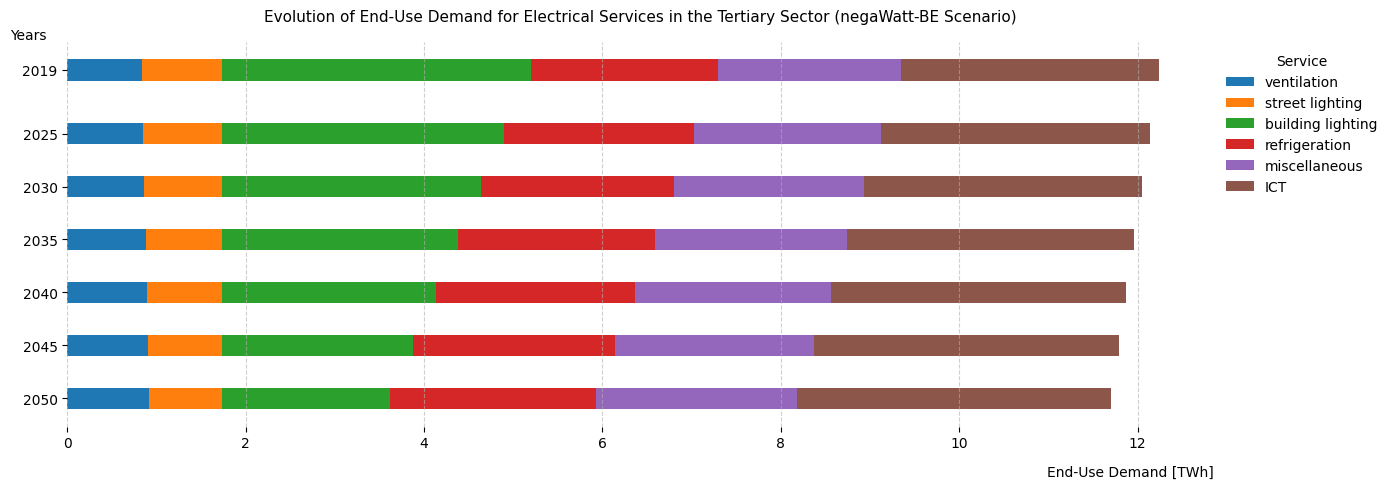

In [43]:
# Tertiary Sector - Electrical Energy Services
ees_TS_tot = {
    'ventilation':        linear_growth(2019,           ref_TS_ees_vnt*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_vnt*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
    'street lighting':    linear_growth(2019,           ref_TS_ees_slt*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_slt*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
    'building lighting':  linear_growth(2019,           ref_TS_ees_blt*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_blt*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
    'refrigeration':      linear_growth(2019,           ref_TS_ees_frg*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_frg*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
    'miscellaneous':      linear_growth(2019,           ref_TS_ees_msc*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_msc*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
    'ICT':                linear_growth(2019,           ref_TS_ees_ict*df_SUF["population [person]"][2019]          *1e-9, 
                                        2050,           trg_TS_ees_ict*df_SUF["population [person]"][2050]          *1e-9, years), # [TWh] kWh/person * person
}
if post_process:
    total_TWh  = sum(val[0] for val in ees_TS_tot.values())
    total_ktoe = total_TWh*1e+3/ktoe_to_GWh
    print(f'-> Relative difference to JRC-IDEES for electrical services: {round(100*(1052.489-total_ktoe)/1052.489,3)}%')
    # === PLOT ===
    df_ees_TS_tot = pd.DataFrame(ees_TS_tot, index=years)
    dfes = df_ees_TS_tot
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfes))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, activity in enumerate(dfes.columns):
        ax.barh(dfes.index, dfes[activity],
                left=bottom, label=activity,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfes[activity]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Electrical Services in the Tertiary Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Service", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()


> **Comment:** Could compare to PATHS2050 (https://perspective2050.energyville.be/sites/paths2050/files/inline-files/Full-Fledged%20Report_1.pdf).


Carrier,Activity,Unit,2019,2025,2030,2035,2040,2045,2050
cold,space cooling,TWh,3.911,4.240,4.514,4.788,5.062,5.336,5.610
,,kWh/person,342.128,358.832,375.420,392.886,409.972,427.199,445.206
electricity,ICT,TWh,2.896,3.015,3.114,3.213,3.313,3.412,3.511
,,kWh/person,253.337,255.160,258.985,263.647,268.321,273.164,278.631
,building lighting,TWh,3.463,3.159,2.905,2.651,2.398,2.144,1.890
,,kWh/person,302.937,267.347,241.603,217.532,194.215,171.648,149.989
,cooking_el,TWh,1.953,2.262,2.535,2.818,3.115,3.424,3.744
,,kWh/person,170.867,191.463,210.801,231.264,252.284,274.110,297.114
,miscellaneous,TWh,2.054,2.095,2.129,2.162,2.196,2.230,2.264
,,kWh/person,179.680,177.300,177.065,177.406,177.855,178.533,179.670


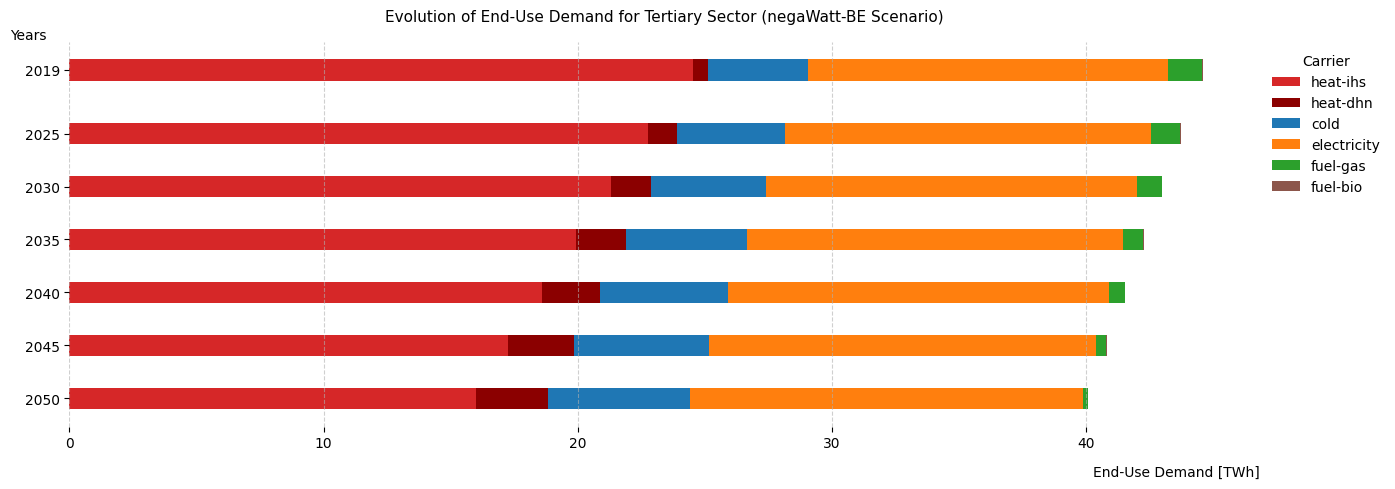

In [44]:
# End-Use Demand: thermal and electical
tes_TS_tot['heat_ihs']   = [(x+y)*z for x,y,z in zip(tes_TS_tot['space heating'], tes_TS_tot['sanitary hot water'], share_heat_ihs)]
tes_TS_tot['heat_dhn']   = [(x+y)*z for x,y,z in zip(tes_TS_tot['space heating'], tes_TS_tot['sanitary hot water'], share_heat_dhn)]
tes_TS_tot['cooking_ng'] = [ x*y    for x,y   in zip(tes_TS_tot['catering'],                                        share_ctrg_gas)]
tes_TS_tot['cooking_bm'] = [ x*y    for x,y   in zip(tes_TS_tot['catering'],                                        share_ctrg_bio)]
tes_TS_tot['cooking_el'] = [ x*y    for x,y   in zip(tes_TS_tot['catering'],                                        share_ctrg_ele)]
df_tes_TS_tot = pd.DataFrame(tes_TS_tot, index=years) # [TWh]
df_ees_TS_tot = pd.DataFrame(ees_TS_tot, index=years) # [TWh]
# End-Use Demand: carrier distribution
df_eud_TS_tot_car = {
    'heat-ihs':    df_tes_TS_tot[["heat_ihs"]].T,
    'heat-dhn':    df_tes_TS_tot[["heat_dhn"]].T,
    'cold':        df_tes_TS_tot[["space cooling"]].T,
    'electricity': pd.concat([df_tes_TS_tot[["cooking_el"]], df_ees_TS_tot], axis=1).T,
    'fuel-gas':    df_tes_TS_tot[["cooking_ng"]].T,
	'fuel-bio':    df_tes_TS_tot[["cooking_bm"]].T,
    }
rows = []
for carrier, df in df_eud_TS_tot_car.items():
    temp = df.copy()
    temp['Carrier'] = carrier
    temp['Activity'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_eud_TS_tot_car = pd.concat(rows, ignore_index=True)
# Carriers distribution - aggregated per carrier
df_eud_TS_tot_cln = df_eud_TS_tot_car.groupby('Carrier')[years].sum()
df_eud_TS_tot_cln = df_eud_TS_tot_cln.reset_index()
# Carriers distribution - normalisations
divider_series = df_SUF["population [person]"]
divider_series.index = divider_series.index.astype(float)
df_eud_TS_hsd_car = (df_eud_TS_tot_car[years].div(divider_series, axis=1))*1e+9
df_eud_TS_hsd_car[['Carrier', 'Activity']] = df_eud_TS_tot_car[['Carrier', 'Activity']]
if post_process:
    # === Table with values ===
    df_abs = df_eud_TS_tot_car.set_index(['Carrier', 'Activity'])[years]
    df_rel = df_eud_TS_hsd_car.set_index(['Carrier', 'Activity'])[years]
    df_abs['Unit'] = 'TWh'
    df_rel['Unit'] = 'kWh/person'
    df_combined = pd.concat([df_abs, df_rel]).set_index('Unit', append=True)
    df_combined = df_combined.sort_index(level=['Carrier', 'Activity'], sort_remaining=False)
    df_final = df_combined.reset_index()
    df_final['Carrier'] = df_final['Carrier'].mask(df_final['Carrier'].duplicated(), '')
    df_final['Activity'] = df_final['Activity'].mask(df_final['Activity'].duplicated(), '')
    styled = (
        df_final.style
        .hide(axis='index')
        .apply(highlight_mode_separator, axis=1)
        .set_properties(subset=['Unit'], **{'font-size': '85%', 'color': 'gray'})
        .set_properties(subset=['Activity'], **{'font-style':'italic'})
        .format({year: "{:.3f}" for year in years})
        .set_table_attributes('style="width:100%;table-layout:fixed;"')
        .apply(lambda row: [bold_mode(cell, row['Carrier'], col) for col, cell in zip(df_final.columns, row)], axis=1)
    )
    display(styled)   
    # === Breakdown bar chart ===
    dfrs = df_eud_TS_tot_cln.set_index('Carrier').reindex(['heat-ihs', 'heat-dhn', 'cold', 'electricity', 'fuel-gas', 'fuel-bio']).transpose()
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfrs))
    colors = ['tab:red','darkred','tab:blue','tab:orange','tab:green','tab:brown']
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, carrier in enumerate(dfrs.columns):
        ax.barh(dfrs.index, dfrs[carrier],
                left=bottom, label=carrier,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfrs[carrier]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Tertiary Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Carrier", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()


---

<font size="5"><b>4. Total End-Use Demand</b></font> <a class="anchor" id="section_4"></a>

---


Aggregate all the data.


In [46]:
# Aggregate global demand data
df_eud_BS_tot_cln = pd.concat([df_eud_RS_tot_cln, df_eud_TS_tot_cln])
df_eud_BS_tot_fin = df_eud_BS_tot_cln.groupby('Carrier').sum().reset_index()
df_eud_BS_tot_fin.loc[ len(df_eud_BS_tot_fin)] = df_eud_BS_tot_fin.sum(numeric_only=True)
df_eud_BS_tot_fin.iloc[-1, df_eud_BS_tot_fin.columns.get_loc('Carrier')] = 'TOTAL'
df_eud_BS_tot_fin = df_eud_BS_tot_fin.set_index('Carrier')
custom_order = [
    'heat-dhn', 
    'heat-ihs', 
    'cold', 
    'electricity', 
    'fuel-gas', 
    'fuel-bio', 
    'TOTAL'
]
df_eud_BS_tot_fin = df_eud_BS_tot_fin.reindex([c for c in custom_order if c in df_eud_BS_tot_fin.index])
df_eud_BS_tot_fin

,2019,2025,2030,2035,2040,2045,2050
Carrier,,,,,,,
heat-dhn,0.754659,2.598260,3.911429,5.010260,5.859634,6.553162,7.011600
heat-ihs,74.727341,67.321740,61.373571,55.639740,50.155366,44.825838,39.732400
cold,4.184000,4.643000,5.025000,5.407000,5.789000,6.171000,6.554000
electricity,26.617827,25.875447,25.278380,24.822838,24.685990,25.063300,25.453824
fuel-gas,1.635648,1.412955,1.210380,0.990286,0.753492,0.499540,0.228380
fuel-bio,0.019830,0.020598,0.021240,0.021876,0.022518,0.023160,0.023796
TOTAL,107.939305,101.872000,96.820000,91.892000,87.266000,83.136000,79.004000


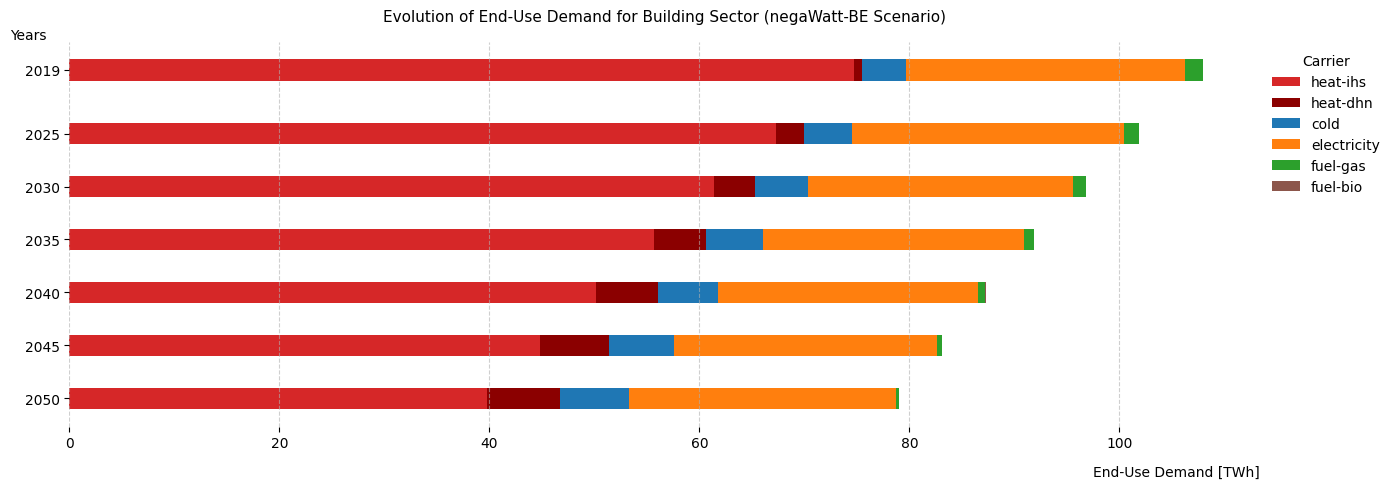

In [47]:
if post_process:
    dfbs = df_eud_BS_tot_fin.loc[['heat-ihs', 'heat-dhn', 'cold', 'electricity', 'fuel-gas', 'fuel-bio']].transpose()
    fig1, ax = plt.subplots(figsize=(14, 5))
    bottom = np.zeros(len(dfbs))
    colors = ['tab:red','darkred','tab:blue','tab:orange','tab:green','tab:brown']
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, carrier in enumerate(dfbs.columns):
        ax.barh(dfbs.index, dfbs[carrier],
                left=bottom, label=carrier,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfbs[carrier]
    ax.set_xlabel("End-Use Demand [TWh]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of End-Use Demand for Building Sector (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Carrier", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()

---

<font size="5"><b>5. Short List of Sufficiency Assumptions</b></font> <a class="anchor" id="section_5"></a>

---

To be done!